In [1]:
###(a)
###regarding each regression coefficients
###回歸係數 β1=2
###回歸係數 β2=0.3
###截距是 2

相關係數 between x1 and x2: 0.77


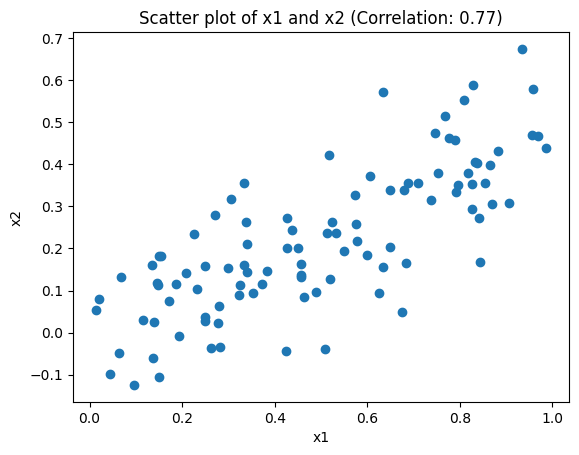

In [5]:
###(b)
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

###相關係數
correlation = np.corrcoef(x1, x2)[0,1]
print(f"相關係數 between x1 and x2: {correlation:.2f}")

###plot
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Scatter plot of x1 and x2 (Correlation: {correlation:.2f})')
plt.show()



In [7]:
###(c)
import statsmodels.api as sm
import numpy as np

import statsmodels.api as sm

# 將 x1 和 x2 作為自變量
X = np.column_stack((x1, x2))

# 添加截距項
X = sm.add_constant(X)

# 擬合最小二乘法回歸模型
model = sm.OLS(y, X).fit()

# 查看回歸結果
print(model.summary())

# 取得回歸係數
beta_0_hat, beta_1_hat, beta_2_hat = model.params

# (d) 僅使用 𝑥1 x1 預測 

# 使用 x1 來預測 y
X_x1 = sm.add_constant(x1)

# 擬合最小二乘法回歸模型
model_x1 = sm.OLS(y, X_x1).fit()

# 查看回歸結果
print(model_x1.summary())

# (e) 僅使用 x2  預測  y

# 使用 x2 來預測 y
X_x2 = sm.add_constant(x2)

# 擬合最小二乘法回歸模型
model_x2 = sm.OLS(y, X_x2).fit()

# 查看回歸結果
print(model_x2.summary())

###(f)
###多變量回歸結果（同時使用 x1 x2) x1顯著 x2不顯著
###單變量回歸結果 只有使用x1 是顯著的。 
###這些結果並不矛盾，因為 

###x1 和 x2 有一定的相關性（共線性），而且在多變量回歸中，可能是因為 x1 捕捉了大部分 y 的變異性，因此 x2 顯得不顯著。在單變量回歸中，x1 的效果仍然顯著，而x2 可能無法解釋太多變異



rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# 加入新的觀測點
x1 = np.concatenate([x1, [0.1]]) 
x2 = np.concatenate([x2, [0.8]]) 
y = np.concatenate([y, [6]])

### x1 x2作為自變量
X = np.column_stack((x1, x2))


# 截距
X = sm.add_constant(X)

# 擬合最小二乘法回歸模型
model = sm.OLS(y, X).fit()
print(model.summary())

# 取得回歸係數
beta_0_hat, beta_1_hat, beta_2_hat = model.params

###(e)
# 使用 x2 來預測 y
X_x2 = sm.add_constant(x2)

# 最小二乘法回歸模型
model_x2 = sm.OLS(y, X_x2).fit()
print(model_x2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        16:30:41   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0